In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

### Acerca la librería XGBoost

El cual es la abreviatura del inglés sXtreme Gradient Boosting, de acuerdo a la documentación del mismo, "es una biblioteca optimizada de aumento de gradiente distribuido diseñada para ser altamente eficiente, flexible y portátil . Implementa algoritmos de aprendizaje automático bajo el marco de Gradient Boosting"[1]

Esta librería utiliza arboles de decisión y técnicas de aprendizaje de refuerzo para mejorar el rendicmiento predictivo y de clasificación. es altamente utilizado en campos como las finanzas y salud.

In [3]:
#utilitario para ignorar Warnings, no tomar en cuenta para el reporte final
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
#utilitario para dar formato a las tablas al estilo 'ggplot' de R
plt.style.use('ggplot')

In [6]:
###Se carga la base de datos a ser utilizada para el estudio
data = pd.read_csv('CTG.csv')
###Removemos las primeras cinco columnas ya que no aportan información valiosa al análisis futuro
data = data.drop(columns=['FileName', 'Date', 'SegFile', 'b', 'e'])
data.head()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [10]:
###Verificamos rápidamente la infgormación general de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 35 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBE       2126 non-null   float64
 1   LB        2126 non-null   float64
 2   AC        2126 non-null   float64
 3   FM        2127 non-null   float64
 4   UC        2127 non-null   float64
 5   ASTV      2127 non-null   float64
 6   MSTV      2127 non-null   float64
 7   ALTV      2127 non-null   float64
 8   MLTV      2127 non-null   float64
 9   DL        2128 non-null   float64
 10  DS        2128 non-null   float64
 11  DP        2128 non-null   float64
 12  DR        2128 non-null   float64
 13  Width     2126 non-null   float64
 14  Min       2126 non-null   float64
 15  Max       2126 non-null   float64
 16  Nmax      2126 non-null   float64
 17  Nzeros    2126 non-null   float64
 18  Mode      2126 non-null   float64
 19  Mean      2126 non-null   float64
 20  Median    2126 non-null   floa

In [11]:
###Optenemos una descripción General de la base de datos
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
LB,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2127.0,7.503056,39.030452,0.0,0.0,0.0,2.0,564.0
UC,2127.0,3.669017,2.877148,0.0,1.0,3.0,5.0,23.0
ASTV,2127.0,47.008933,17.210648,12.0,32.0,49.0,61.0,87.0
MSTV,2127.0,1.335449,0.891543,0.2,0.7,1.2,1.7,7.0
ALTV,2127.0,9.884814,18.476534,0.0,0.0,0.0,11.0,91.0
MLTV,2127.0,8.207616,5.701926,0.0,4.6,7.4,10.8,50.7
DL,2128.0,1.576128,2.517794,0.0,0.0,0.0,3.0,16.0


### Informacion sobre el dataset

*Los cardiotocogramas* (CTG) son una manera de evaluar la salud del feto, a través del monitoreo de la frecuencia cardiaca de éste y las contracciones uterinas de la madre, permite el tomar acción y prevenir la mortalidad infantil. Esto, a traves de leer sensores de ultrasonido para conocer el ritmo cardiaco del feto, y un tocógrafo para registrar las contracciones uterinas. [2]


El dataste esta compuesto de 40 variables y 2126 registros extraidos de exámenes de cardiotogramas, que fueron clasificados de dos maneras, una con respecto al patrón morfológico (A, B, C. ...) y de acuerdo al estado fetal (N, S, P):

Cabe mencionar que cuando se mencione "SisPorto", se refiere al sistema y evaluación de registros CTG desarrollado por la Universidad de Oporto en Portugal.

### Variables:

lista de variables (omitidas las primero cinco columnas para este estudio), para ser usadas en el estudio.

- *LBE: valor base (Médico Experto) 
- *LB: valor base (Generado por SisPorto[3])
- *AC: aceleraciones (SisPorto)
- *FM: movimiento fetal (SisPorto)
- *UC: contracciones uterinas (SisPorto)
- *ASTV: porcentaje de tiempo con variabilidad a corto plazo anormal (SisPorto)
- *mSTV: valor medio de la variabilidad a corto plazo (SisPorto)
- *ALTV: porcentaje de tiempo con variabilidad a largo plazo anormal (SisPorto)
- *mLTV: valor medio de la variabilidad a largo plazo (SisPorto)
- *DL: desaceleraciones leves
- *DS: desaceleraciones severas
- *DP: desaceleraciones prolongadas
- *DR: desaceleraciones repetitivas
- *Ancho: anchura del histograma
- *Mín: frecuencia baja del histograma
- *Máx: frecuencia alta del histograma
- *Nmax: número de picos del histograma
- *Nzeros: número de ceros del histograma
- *Moda: moda del histograma
- *Media: media del histograma
- *Mediana: mediana del histograma
- *Varianza: varianza del histograma
- *Tendencia: tendencia del histograma: -1=asimétrica a la izquierda; 0=simétrica; 1=asimétrica a la derecha

### Clasificación por Patrón Morfológico de 10 Clases, resumida en la columna CLASS
- A: Patrón de sueño tranquilo
- B: Patrón de sueño REM
- C: vigilia tranquila
- D: vigilia activa
- SH: patrón de cambio (A o Susp con cambios)
- AD: patrón acelerativo/decelerativo (situación de estrés)
- DE: patrón decelerativo (estimulación vagal)
- LD: patrón ampliamente decelerativo
- FS: patrón plano-sinusoidal (estado patológico)
- SUSP: patrón sospechoso
- CLASS: código de clase (de 1 a 10) para las clases de A a SUSP

### Clasificación por Estado del Feto de 3 Clases, resumida en la columna NSP
- NSP: Normal=1; Sospechoso=2; Patológico=3


In [9]:
###Confirmamos cuantos valores nulos existen por columna
data.isnull().sum()

LBE         3
LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
DR          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           3
B           3
C           3
D           3
E           3
AD          3
DE          3
LD          3
FS          3
SUSP        3
CLASS       3
NSP         3
dtype: int64

Nuestro dataset tiene muy pocos valores nulos. Representando un porcentaje muy bajo del dadtaseete total. Elegirimos eliminar estos registros inicialmente. Posteriorment dependiendod del resultado de modelo predictivo haremos una imputacion del valor.

## Análisis Exploratorio

### Categoría NSP (<span style="color:red; font-family: Helvetica;">JGS:</span> revisar, me parece mejor entender el grueso de las variables a utilizar (las que tienen un *), que significan, y si pueden o no aportar, por ejemplo, no deberían usarse las las 10 Clases y por ejemplo, será mejor utilizar sólo la media y no ambas juntas (mediana y media), o sólo usar la mediana)
El archivo consta de muchas variables, para ir priorizando lo que queremos ver, primero observaremos la variable categoria NSP, para entender si nuestra data esta balanceada o no

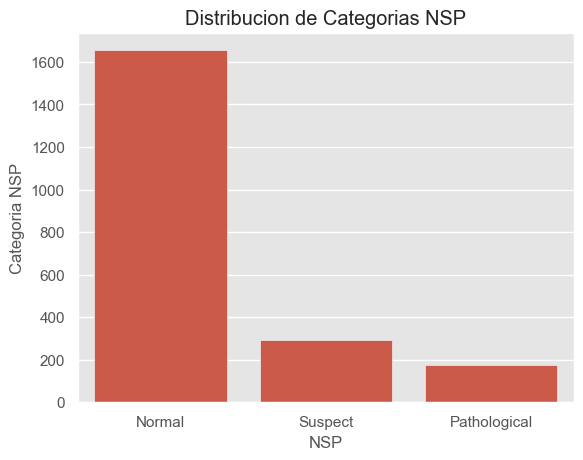

In [23]:
###Con el siguiente código se graficará la columna 'NSP' que corresponde a la clasificación
#we want to chart the column "NSP" from the file
plt.figure()
data_chart = data.copy()
data_chart['NSP'] = data['NSP'].replace({1: 'Normal', 2:'Suspect', 3:'Pathological'})
ax = sns.countplot(data=data_chart, x="NSP", order=["Normal", "Suspect", "Pathological"])
ax.set_title('Distribucion de Categorias NSP')
ax.set_ylabel('Casos')
ax.set_ylabel('Categoria NSP')
plt.show()

Nuestras clases estan inbalanceadas

<Axes: >

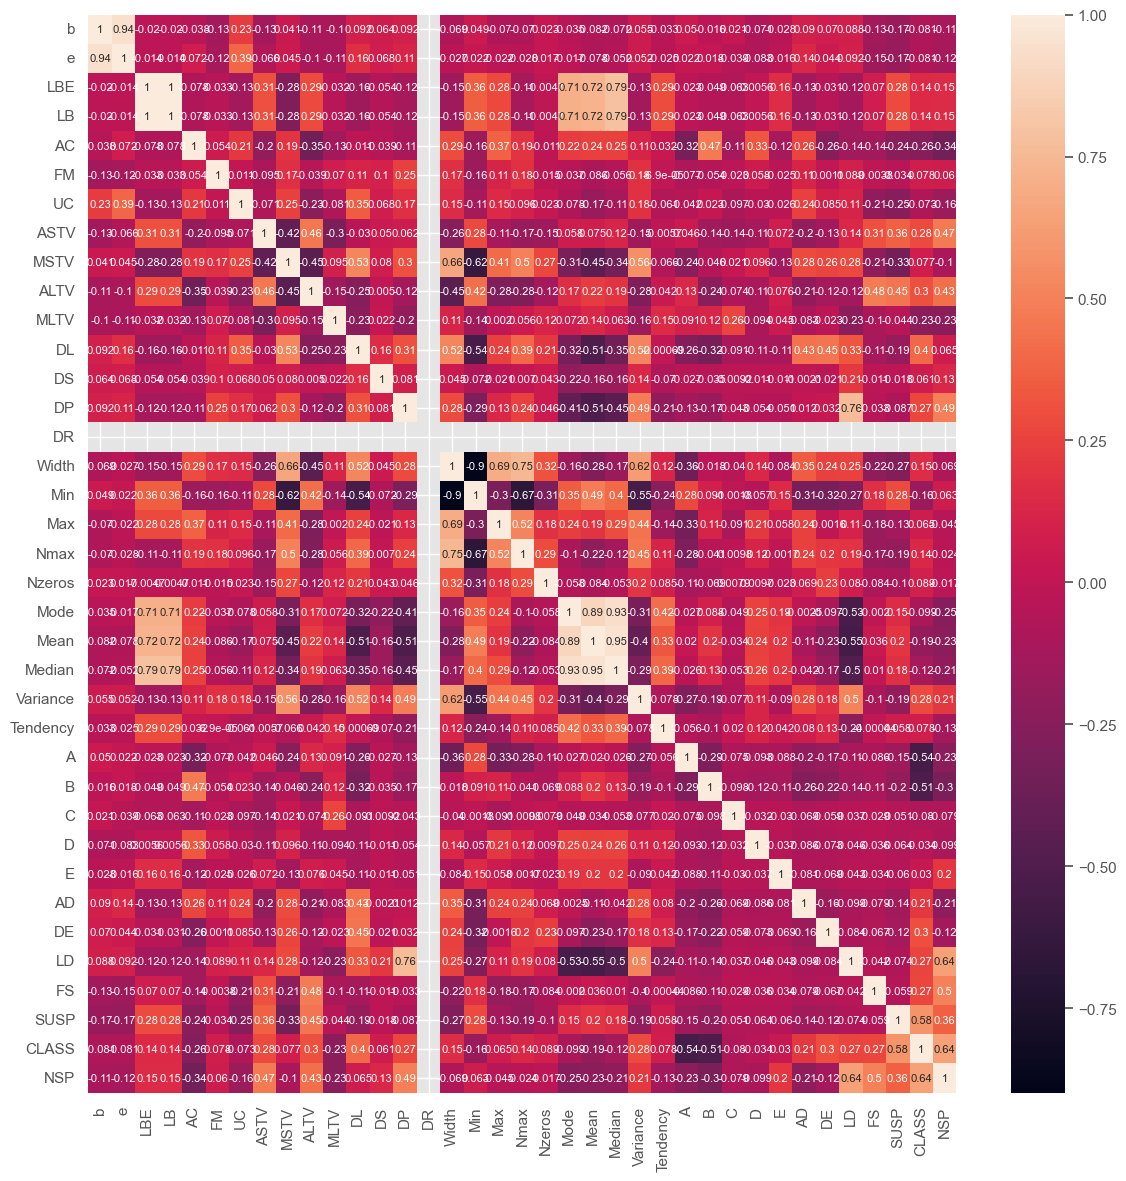

In [22]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 8})

In [34]:
data.drop(columns=['SUSP', 'CLASS']).corr()['NSP'].sort_values(ascending=False)

NSP         1.000000
LD          0.635526
FS          0.501290
DP          0.490626
ASTV        0.471191
ALTV        0.426146
Variance    0.206630
E           0.199349
LBE         0.148151
LB          0.148151
DS          0.131934
DL          0.065328
Min         0.063175
FM          0.060366
Nzeros     -0.016682
Nmax       -0.023666
Max        -0.045265
Width      -0.068789
C          -0.079222
D          -0.098606
MSTV       -0.103382
b          -0.110756
e          -0.117499
DE         -0.122460
Tendency   -0.131976
UC         -0.163295
Median     -0.205033
AD         -0.208922
MLTV       -0.226797
Mean       -0.226985
A          -0.228640
Mode       -0.250412
B          -0.303112
AC         -0.340394
DR               NaN
Name: NSP, dtype: float64

La matriz de correlaciones claramente muestra que hay un par de variables que estan altamente correlacionadas con nuestra variable objetivo NSP: 
1. LD - Patron ampliamente decelerativo
2. FS - patrón plano-sinusoidal (estado patológico)
3. DP - desaceleraciones prolongadas 
4. ASTV - porcentaje de tiempo con variabilidad a corto plazo anormal 
5. ALTV - porcentaje de tiempo con variabilidad a largo plazo anormal.
6. Variance - Varianza del histograma

Hagamos un analysis bivariado para entender el comportamiento


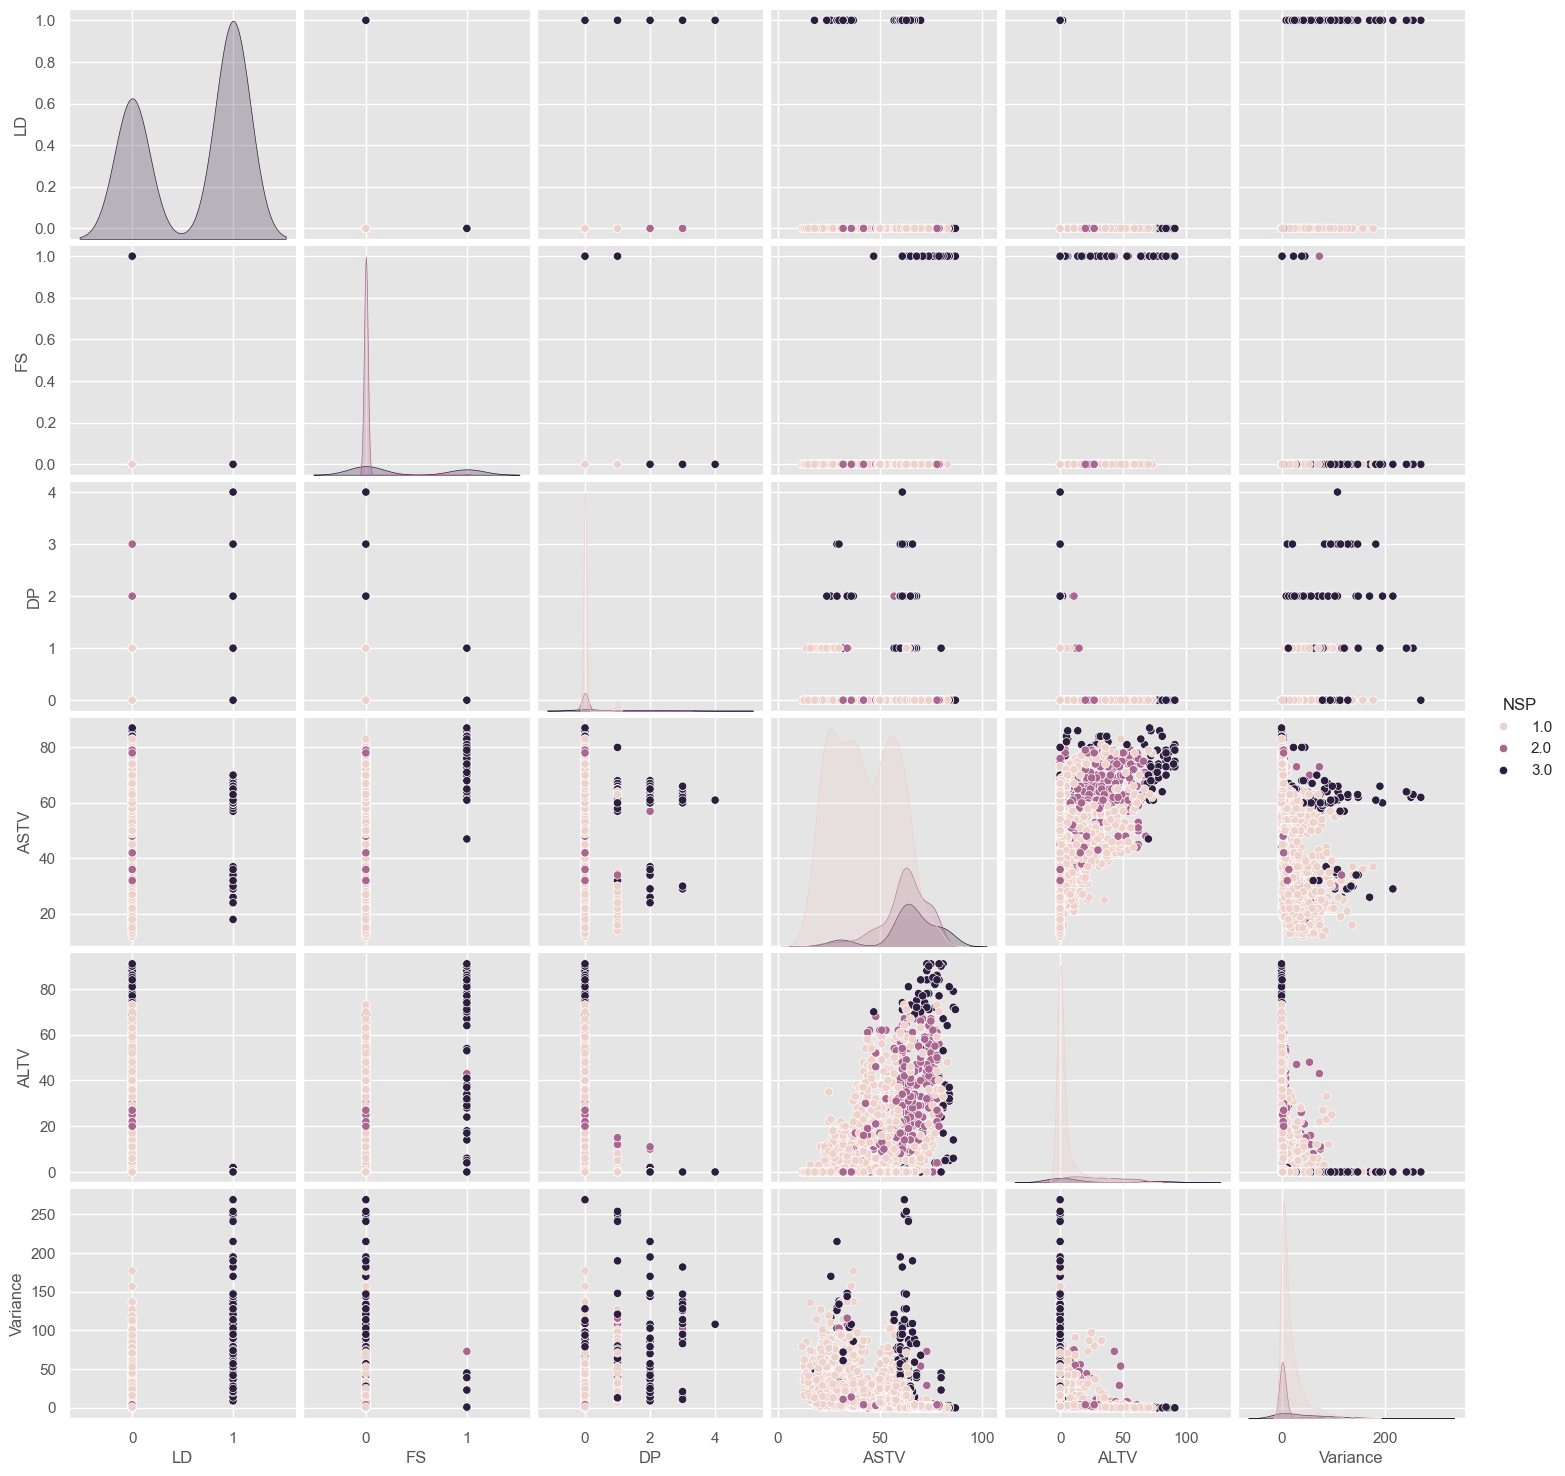

In [35]:
data_chart_vibar = data[['LD', 'FS', 'DP', 'ASTV', 'ALTV', 'Variance', 'NSP']]
sns.pairplot(data_chart_vibar, hue='NSP')

## Detección de anomalías

In [36]:
print('aqui va codigo')

aqui va codigo


## Agrupacion y modelado
### Primero vamos a seleccionar nuestros features mas importantes antes de entrenar un modelo
### Primero vamos a segregar los datos y a escalarlos
### <span style="color:red; font-family: Helvetica;">JGS:</span> Considerar usar sólo las variables con asterisco

Primero hacemos el split de entrenamiento y validacion. Aplicaremos scaling al data set. Esto nos ayuda a reducir el efecto de outliers, tambien.

/Users/andresmoreno/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/andresmoreno/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/andresmoreno/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/andresmoreno/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future

<Axes: xlabel='Score', ylabel='Feature'>

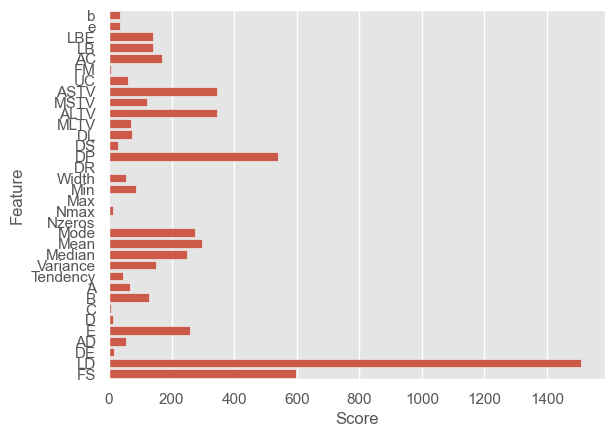

In [43]:
data_non = data.dropna()
X=data_non.drop(['SUSP', 'CLASS', 'NSP'], axis=1)
Y=data_non['NSP']
best = SelectKBest(score_func=f_classif, k='all')
fit = best.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
features = pd.concat([dfcolumns, dfscores], axis=1)
features.columns = ['Feature', 'Score']

sns.barplot(data=features, x='Score', y='Feature', orient='h')


Los resultados de este feature selection confirman lo que habiamos visto anteriormente, los features que principalmente comparten informacion son: LD, FS, DP, ASTV, ALTV, Mode, Mean, Median, E.
Seleccionaremos a todo lo que sea mayor a 200


In [44]:
feat_select = features[features['Score'] >= 200]
feat_select = list(feat_select['Feature'])
feat_select.append('NSP')
model_data = data_non[feat_select]
model_data

,ASTV,ALTV,DP,Mode,Mean,Median,E,LD,FS,NSP
0,73.0,43.0,0.0,120.0,137.0,121.0,0.0,0.0,1.0,2.0
1,17.0,0.0,0.0,141.0,136.0,140.0,0.0,0.0,0.0,1.0
2,16.0,0.0,0.0,141.0,135.0,138.0,0.0,0.0,0.0,1.0
3,16.0,0.0,0.0,137.0,134.0,137.0,0.0,0.0,0.0,1.0
4,16.0,0.0,0.0,137.0,136.0,138.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2121,79.0,25.0,0.0,153.0,150.0,152.0,1.0,0.0,0.0,2.0
2122,78.0,22.0,0.0,152.0,148.0,151.0,1.0,0.0,0.0,2.0
2123,79.0,20.0,0.0,153.0,148.0,152.0,1.0,0.0,0.0,2.0
2124,78.0,27.0,0.0,152.0,147.0,151.0,1.0,0.0,0.0,2.0


In [49]:
#Splitting
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(model_data.drop(['NSP'], axis=1), model_data['NSP'],test_size=0.25, random_state=2978,
                                                 stratify=model_data['NSP'])

#Scaling

scaler=preprocessing.StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test) 


In [58]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=2978))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=2978))])

# pipeline_xgb = Pipeline([('xgb_classifier', XGBClassifier(random_state=2978))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'LogisticR', 1: 'DecTree', 2: "RandomForest", 3:"SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train_scaled, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

/Users/andresmoreno/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andresmoreno/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

LogisticR: 0.855114 
DecTree: 0.956093 
RandomForest: 0.965495 
SVC: 0.851958 


## Referencias

- [1] XGBoost Documentation. (s.f.). XGBoost Documentation. Recuperado de https://xgboost.readthedocs.io/en/stable/
- [2] CUN. (s.f.). Diccionario Médico. Recuperado de https://www.cun.es/diccionario-medico/terminos/cardiotocografia
- [3] SISPORTO. (s.f.). A Brief History of the SISPORTO Project. Recuperado de https://sisporto.med.up.pt/a-brief-history-of-the-sisporto-project/


